In [157]:
#Basandonos en el siguiente post: https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

# Feature Selection
### A partir de distintos algoritmos buscaremos seleccionar los features que mas informacion aportan a la prediccion del target

## Preprocesamiento

In [158]:
import Utilidades as ut
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_classif



#En realidad habria que levantar un set de datos que no este destinado a redes neuronales, un 'feature_selection.pkl'

#Cargamos el dataset
df = pd.read_pickle("Archivos/Neuronales_entrenamiento.pkl")
df_test = pd.read_pickle("Archivos/Neuronales_validacion.pkl")

#Dividimos el dataframe en features-labels
df_x, df_y = ut.split_labels(df)
df_x_test, df_y_test = ut.split_labels(df_test)

#Procesamos los dataframes
df_x, df_x_test = ut.conversion_fechas(df_x, df_x_test)
df_x, df_x_test = ut.codificar_categoricas(df_x, df_y, df_x_test, modo='catboost')
df_x, df_x_test = ut.normalizacion_numericas(df_x, df_x_test, modo='normalizacion')

#Convertimos el dataframe a un array de numpy
x = ut.df_a_vector(df_x)
y = ut.df_a_vector(df_y).flatten()

/home/julian/anaconda3/envs/tensorflow/lib/python3.6/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


## Information Gain

In [159]:
importances = mutual_info_classif(x, y)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])

<AxesSubplot:>

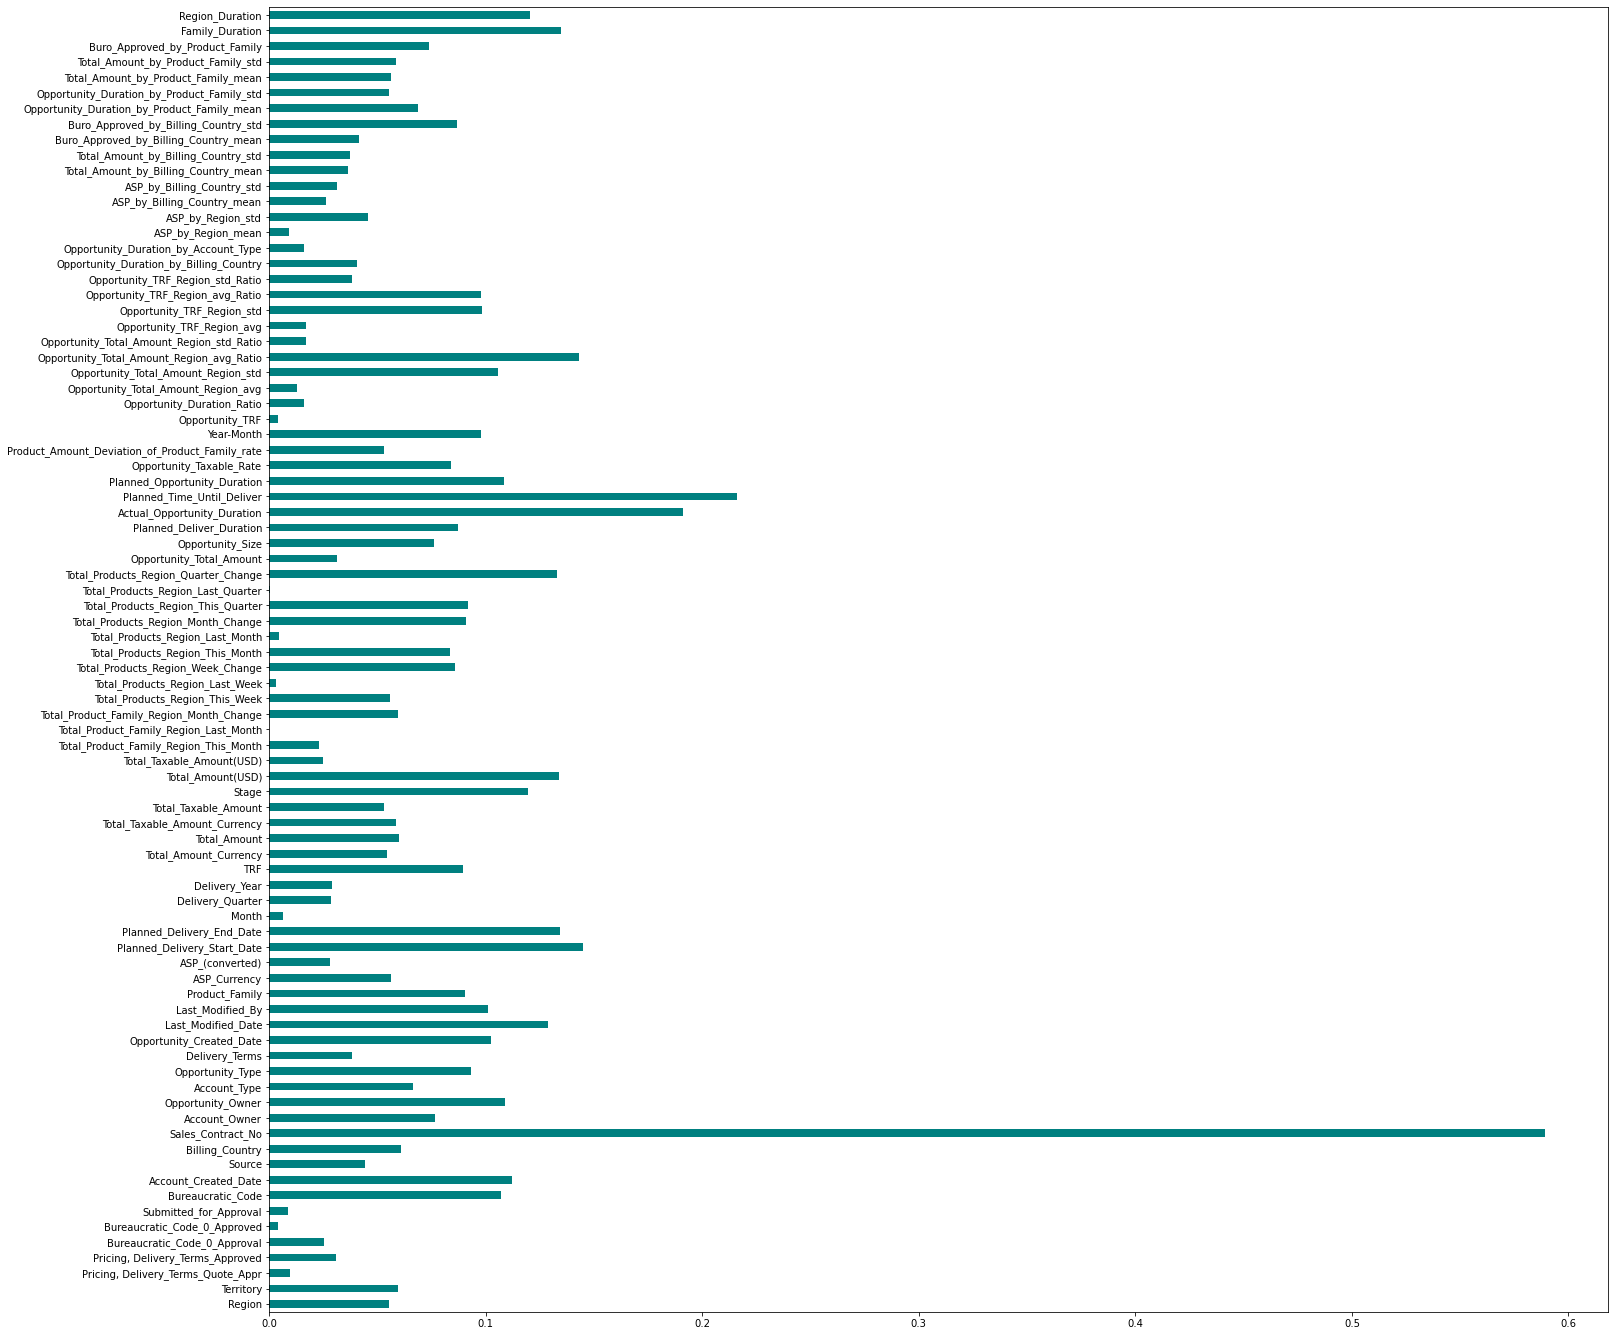

In [160]:
feat_importances.plot(kind='barh', color='teal', figsize=(24, 24))

In [161]:
features = feat_importances.to_frame()
features.columns = ['Score']
features['Score'] = (features['Score'] > features['Score'].median()).astype(int)
features

,Score
Region,0
Territory,1
"Pricing, Delivery_Terms_Quote_Appr",0
"Pricing, Delivery_Terms_Approved",0
Bureaucratic_Code_0_Approval,0
...,...
Total_Amount_by_Product_Family_mean,0
Total_Amount_by_Product_Family_std,1
Buro_Approved_by_Product_Family,1
Family_Duration,1


## Fisher's Score

<AxesSubplot:>

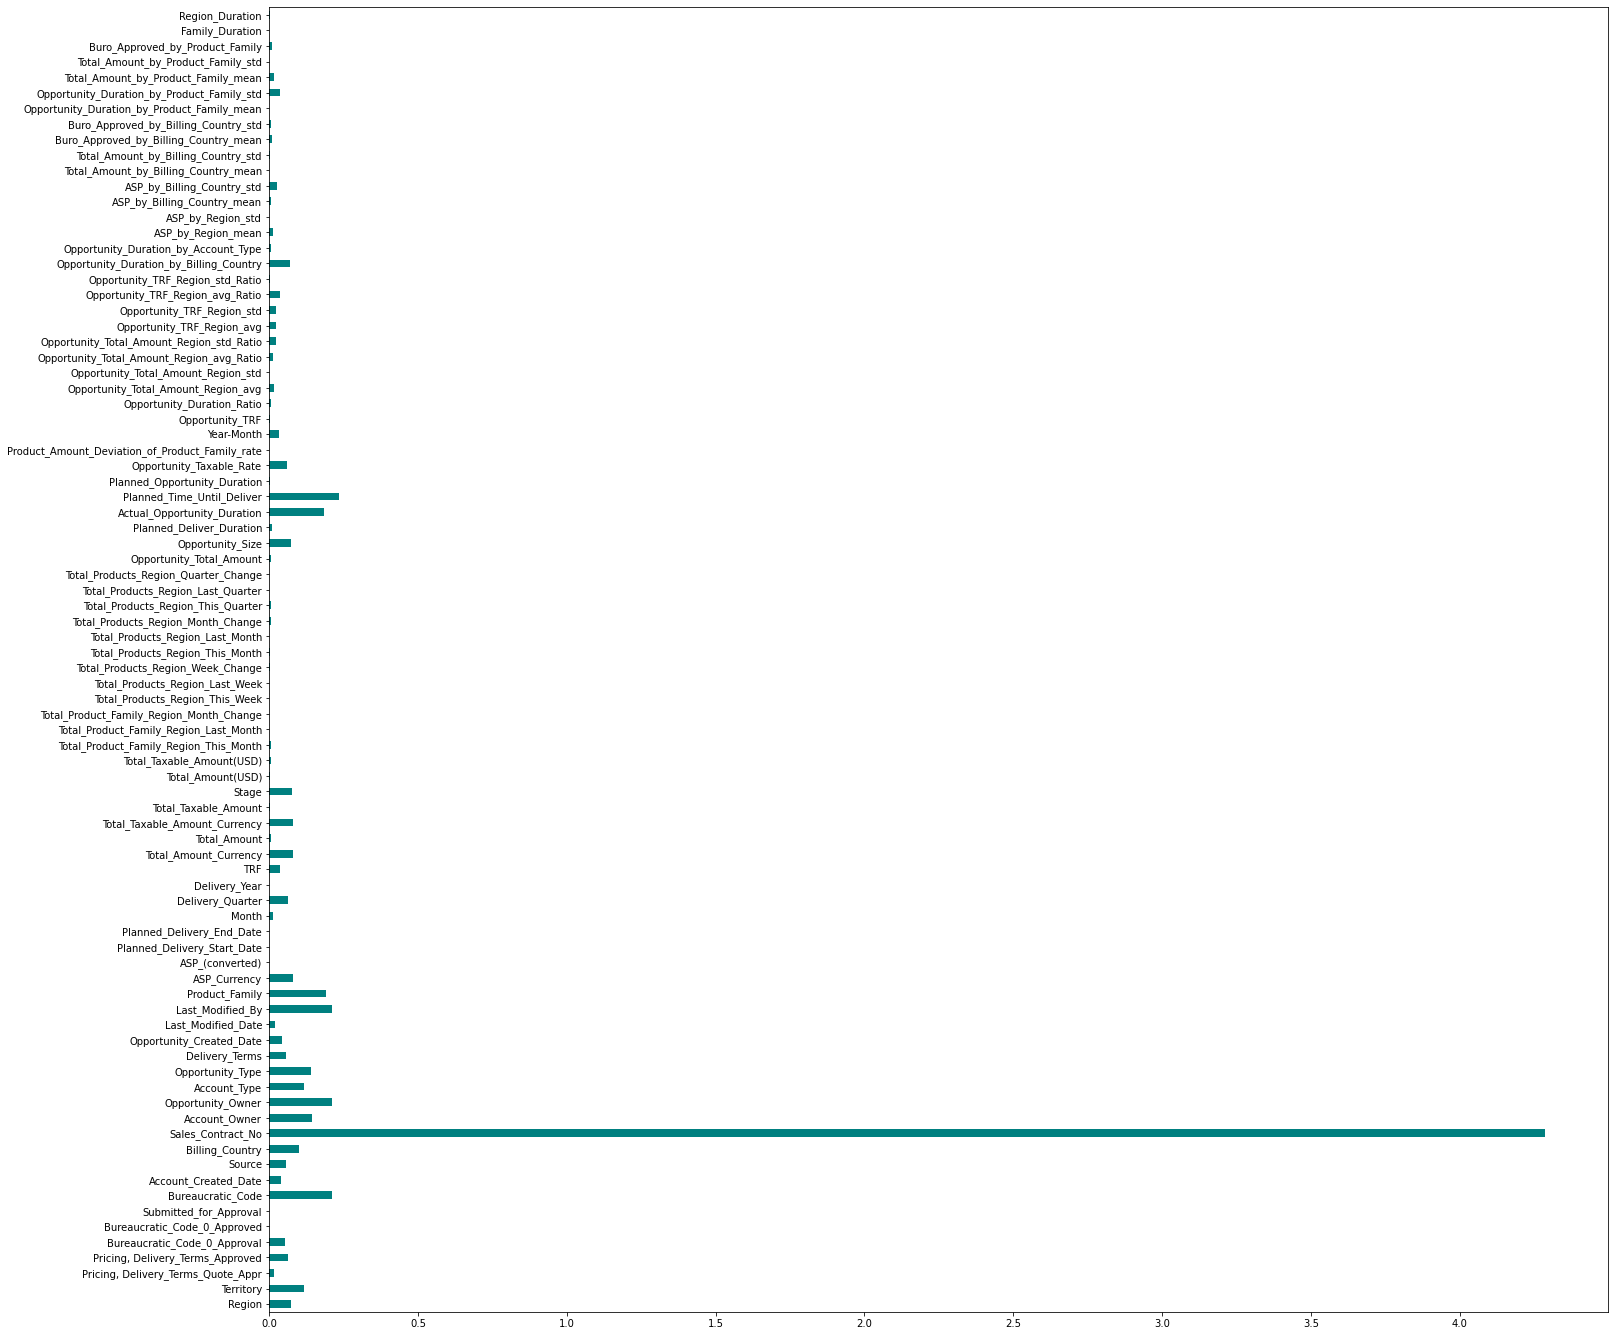

In [162]:
from skfeature.function.similarity_based import fisher_score

ranks = fisher_score.fisher_score(x, y)
feat_importances = pd.Series(ranks, df.columns[0:len(df.columns) - 1])
feat_importances.plot(kind='barh', color='teal', figsize=(24, 24))

In [163]:
actual = (feat_importances > feat_importances.median()).astype(int)
features['Score'] = features['Score'] + actual
features

,Score
Region,1
Territory,2
"Pricing, Delivery_Terms_Quote_Appr",1
"Pricing, Delivery_Terms_Approved",1
Bureaucratic_Code_0_Approval,1
...,...
Total_Amount_by_Product_Family_mean,1
Total_Amount_by_Product_Family_std,1
Buro_Approved_by_Product_Family,1
Family_Duration,1


## Correlation Coefficient

In [164]:
import seaborn as sns

#Damos un punto extra por cada threshold

thresholds = [0.1, 0.2, 0.3, 0.4]

combined = df_x.copy()
combined['Stage'] = df_y['Stage']

cor = combined.corr()
#plt.figure(figsize = (24, 24))
#sns.heatmap(cor, annot=True)
cor = cor.drop(index=['Stage'])[['Stage']]

for t in thresholds:
    index = cor[np.abs(cor.Stage) > t].index
    features.loc[index, ['Score']] = features.loc[index, ['Score']] + 1

## Variance Threshold

In [165]:
from sklearn.feature_selection import VarianceThreshold

#Con threshold elegimos el valor de la varianza a partir de la cual queremos marcar a las columnas como "varianza cero"
v_t = VarianceThreshold(threshold=0)
#Procesamos con el dataset de train
v_t.fit(x)
#Obtenemos una serie de pandas donde cada fila indica si el feature tiene (True) o no tiene (False) varianza superior al threshold
result = pd.Series(v_t.get_support())
result.index = features['Score'].index
features['Score'] = features['Score'] + result_copy

In [167]:
features.nlargest(30, columns='Score')

,Score
Bureaucratic_Code,7
Sales_Contract_No,7
Opportunity_Owner,7
Last_Modified_By,7
Product_Family,7
Territory,6
Billing_Country,6
Account_Owner,6
Account_Type,6
Opportunity_Type,6
